In [182]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd
import numpy as np

file = '/Users/xinwang/Downloads/generate_call_count.csv'
data = pd.read_csv(file)


count_df = pd.DataFrame(columns=['tenantid'])

tenants = []
for name, group in data.groupby('tenantid'):
    tenants.append(name)
count_df['tenantid'] = tenants
print(tenants)


dates_array = []
for name, group in data.groupby('tenantid'):
    dates = [k.split(' ')[0] for k in group['_timeslice']]
    dates_array.append(dates)

x = np.argmax(np.array(dates_array))
dates_columns = dates_array[x]


for name, group in data.groupby('tenantid'):
    for (_timeslice, _count) in zip(group['_timeslice'], group['_count']):
        date = _timeslice.split(' ')[0]
        count = _count
        
        count_df.loc[count_df['tenantid']==name, date] = count
        

count_df = count_df.fillna(method='ffill')

[10012, 10176, 10194, 10221, 10301, 10375, 10493, 10494, 10535, 10566, 10616, 10691, 10909, 10933, 10942, 11278, 11316, 11380, 11466, 11557, 11575, 11629, 11673, 11693, 11714, 11740, 11774, 11854, 11911, 11915, 11963, 12009, 12100, 12124, 12213, 12311, 12333, 12541, 13015, 13029, 13073, 13155, 13175, 13191, 13230, 13265, 13327, 13406, 13641, 13656, 13678, 13703, 13762, 13771, 13794, 13804, 13818, 13830, 14004, 14006, 14098, 14112, 14139, 14448, 14540, 14856, 14890, 14935, 15585, 16460, 17372, 20468, 21288, 21943, 23133, 25040, 25202, 25620, 25751, 25818, 25840, 25978, 26162, 26164, 26923, 26967]


In [198]:
data.groupby('tenantid').mean().sort_values(by='_count', ascending=False)


,_count
tenantid,
12009,9925.466667
13191,3440.258065
16460,2747.566667
25840,2693.000000
13656,2513.612903
13265,2469.733333
13771,2110.612903
11629,2012.269231
13029,1074.933333


In [183]:
draw_count_df = count_df[:10]


plt.figure(figsize=(16,12))

i=1
for record in draw_count_df.values:
    tenantId = int(record[0])
    if tenantId == 16460:
        plt.subplot(5, 1, 1)

        plt.title(str(tenantId) + ' count')
        plt.plot(range(len(dates_columns)), record[1:], 'r', label='tenantId')

    i += 1
    
plt.show()
fig.savefig('test2png.png', dpi=100)

<Figure size 1152x864 with 0 Axes>

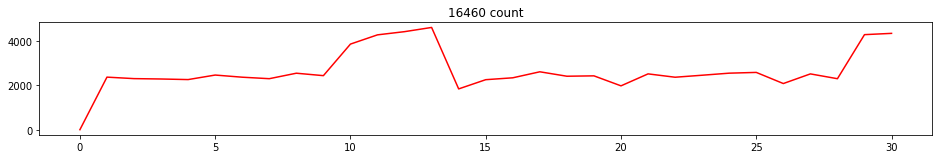

In [192]:
plt.figure(figsize=(16,12))

for record in count_df.values:
    tenantId = int(record[0])
    if tenantId == 16460:
        plt.subplot(5, 1, 1)

        plt.title(str(tenantId) + ' count')
        count = record[1:]
        plt.plot(range(len(dates_columns)), list(reversed(record[1:])), 'r', label='tenantId')
    
plt.show()
fig.savefig('16460.png', dpi=100)

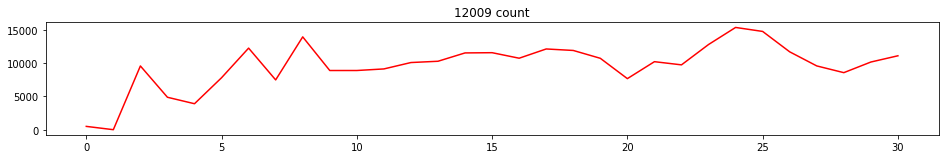

In [ ]:
plt.figure(figsize=(16,12))

for record in count_df.values:
    tenantId = int(record[0])
    if tenantId == 12009:
        plt.subplot(5, 1, 1)

        plt.title(str(tenantId) + ' count')
        count = record[1:]
        plt.plot(range(len(dates_columns)), list(reversed(record[1:])), 'r', label='tenantId')
    
plt.show()
fig.savefig('16460.png', dpi=100)